# Prosper Loan Exploratory Analyses
## by Svajune Klimasauskaiste

## Table of Contents
<ul>
<li><a href="#intro">What is a Prosper Loan?</a></li>
<li><a href="#question">Question - What was Prosper way to their success over the years?</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#univariate">Univariate Exploration</a></li>
<li><a href="#bivariate">Bivariate and Multivariate Explorations</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#finalreport">Presentation</a></li>
</ul>

<a id='intro'></a>
## What is a Prosper Loan ?!

According to [this](https://www.nerdwallet.com/blog/loans/prosper-personal-loans-review/) article here is a brief description of a Prosper Loan: 

>Prosper is one of the pioneers of peer-to-peer, or marketplace, lending, which connects good-credit borrowers with investors who can choose to fund their loans.

>Prosper personal loans are a good fit for borrowers who:
* **Have good to excellent credit scores.** Prosper’s minimum score is `640`, but its customers average `717`.
* **Have substantial annual income.** There’s no minimum requirement, but the average for Prosper borrowers is about `$89,000`.
* **Want a personal loan from an experienced online lender.** San Francisco-based Prosper was founded in `2005` and has facilitated more than `$15 billion` in loans.

>**Prosper loan rates and terms (for the year 2019):**
* Loan amounts	`$2,000 - $40,000`
* Typical APR	`6.95% - 35.99%`
* Origination fee: `2.4% - 5%`.
* Repayments	`3 or 5 years`
* How to qualify	
    * Minimum credit score: `640`, but average is `717`.
    * Minimum annual income: None, but average is `$89,000`.
    * Maximum debt-to-income ratio: `50%` (excluding mortgage).
    


<a id='question'></a>
## Question - What was Prosper way to their success over the years?

I have the Loan data from 2005 until the beginning of 2014. I'm curious to find out how was Prosper Loan status during the financial crisis and in general how Prosper Loans changed over the years. 

<a id='wrangling'></a>
## Data Wrangling

This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. Data dictionary can be found in the Data Set repository. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from mpl_toolkits import mplot3d

%matplotlib inline

### Gather Data

In [2]:
#Load the Data Set
df_raw=pd.read_csv("DataSet/prosperLoanData.csv")
df_raw.head(1)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.158,0.138,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258


In [3]:
#Set the base color for all the visualisations
base_color=sb.color_palette()[0]

### Assess Data

 To answer my question, here I listed the following features that I'd like to have a closer look at: 
* LoanOriginationDate - The date the loan was originated.
* LoanOriginalAmount - The origination amount of the loan.
* LoanStatus - The current status of the loan: Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.
* ProsperRating (numeric) - The  Prosper Rating assigned at the time the listing was created: 0 - N/A, 1 - HR, 2 - E, 3 - D, 4 - C, 5 - B, 6 - A, 7 - AA.  Applicable for loans originated after July 2009.
* Term - The length of the loan expressed in months.
* BorrowerRate - The Borrower's interest rate for this loan. 
* EmploymentStatus - The employment status of the borrower at the time they posted the listing.
* EmploymentStatusDuration - The length in months of the employment status at the time the listing was created.
* IsBorrowerHomeowner - A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner.
* IncomeRange - The income range of the borrower at the time the listing was created.
* IncomeVerifiable - The borrower indicated they have the required documentation to support their income.
* StatedMonthlyIncome - The monthly income the borrower stated at the time the listing was created.
* CreditScoreRangeLower - The lower value representing the range of the borrower's credit score as provided by a consumer credit rating agency.
* BankcardUtilization - The percentage of available revolving credit that is utilized at the time the credit profile was pulled.
* DebtToIncomeRatio - The debt to income ratio of the borrower at the time the credit profile was pulled. This value is Null if the debt to income ratio is not available. This value is capped at 10.01 (any debt to income ratio larger than 1000% will be returned as 1001%).

In [4]:
#create a new data set with my listed features
df=pd.DataFrame(data=df_raw,columns=['LoanOriginationDate', 'LoanOriginalAmount', 'LoanStatus',
                                     'ProsperRating (numeric)', 'Term', 'BorrowerRate',
                                     'EmploymentStatus', 'EmploymentStatusDuration', 'IsBorrowerHomeowner', 
                                     'IncomeRange', 'IncomeVerifiable', 'StatedMonthlyIncome', 
                                     'CreditScoreRangeLower', 'BankcardUtilization','DebtToIncomeRatio'])

In [5]:
#check the size of the data set
df.shape

(113937, 15)

In [6]:
df.head(1)

,LoanOriginationDate,LoanOriginalAmount,LoanStatus,ProsperRating (numeric),Term,BorrowerRate,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,CreditScoreRangeLower,BankcardUtilization,DebtToIncomeRatio
0,2007-09-12 00:00:00,9425,Completed,NaN,36,0.158,Self-employed,2.0,True,"$25,000-49,999",True,3083.333333,640.0,0.0,0.17


In [7]:
#Overview of statistical information
df.describe()

,LoanOriginalAmount,ProsperRating (numeric),Term,BorrowerRate,EmploymentStatusDuration,StatedMonthlyIncome,CreditScoreRangeLower,BankcardUtilization,DebtToIncomeRatio
count,113937.00000,84853.000000,113937.000000,113937.000000,106312.000000,1.139370e+05,113346.000000,106333.000000,105383.000000
mean,8337.01385,4.072243,40.830248,0.192764,96.071582,5.608026e+03,685.567731,0.561309,0.275947
std,6245.80058,1.673227,10.436212,0.074818,94.480605,7.478497e+03,66.458275,0.317918,0.551759
min,1000.00000,1.000000,12.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,4000.00000,3.000000,36.000000,0.134000,26.000000,3.200333e+03,660.000000,0.310000,0.140000
50%,6500.00000,4.000000,36.000000,0.184000,67.000000,4.666667e+03,680.000000,0.600000,0.220000
75%,12000.00000,5.000000,36.000000,0.250000,137.000000,6.825000e+03,720.000000,0.840000,0.320000
max,35000.00000,7.000000,60.000000,0.497500,755.000000,1.750003e+06,880.000000,5.950000,10.010000


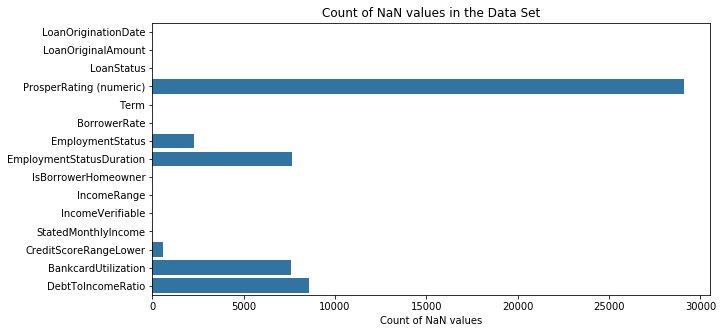

In [8]:
#Count and Plot missing values for the data set
plt.figure(figsize = [10, 5]) 
na_counts=df.isna().sum()
sb.barplot(y=na_counts.index.values, x=na_counts, color=base_color)
plt.title('Count of NaN values in the Data Set')
plt.xlabel('Count of NaN values');

### Data Cleaning and Augmenting

In [9]:
#Convertion Term and EmploymentStatusDuration into years instead of months
df['Term']=df['Term'].astype(int)/12
df['EmploymentStatusDuration']=df['EmploymentStatusDuration']/12

In [10]:
#Round Monthly Income format
df['StatedMonthlyIncome']=round(df['StatedMonthlyIncome']);

In [11]:
# Create a Year column
df['LoanOriginationDate']=pd.to_datetime(df['LoanOriginationDate'])
df['Year'] = df['LoanOriginationDate'].dt.year.astype(int)

In [12]:
# Max and Min Dates 
print('Date of the first Loan is: {}'.format(df.LoanOriginationDate.min()))
print('Date of the last Loan is: {}'.format(df.LoanOriginationDate.max()))

Date of the first Loan is: 2005-11-15 00:00:00
Date of the last Loan is: 2014-03-12 00:00:00


In [13]:
# Check Income Range values
df['IncomeRange'].unique()

array(['$25,000-49,999', '$50,000-74,999', 'Not displayed', '$100,000+',
       '$75,000-99,999', '$1-24,999', 'Not employed', '$0'], dtype=object)

In [14]:
#Create an Income Range column with numeric categorical values.
df['IncomeRange(numeric)'] = df['IncomeRange'].map({'Not displayed': 0, 
                                           'Not employed': 1,
                                          '$0': 2,
                                          '$1-24,999': 3,
                                          '$25,000-49,999':4,
                                          '$50,000-74,999':5,
                                          '$75,000-99,999':6,
                                          '$100,000+':7})

In [15]:
#Check statistical information
df.describe()

,LoanOriginalAmount,ProsperRating (numeric),Term,BorrowerRate,EmploymentStatusDuration,StatedMonthlyIncome,CreditScoreRangeLower,BankcardUtilization,DebtToIncomeRatio,Year,IncomeRange(numeric)
count,113937.00000,84853.000000,113937.000000,113937.000000,106312.000000,1.139370e+05,113346.000000,106333.000000,105383.000000,113937.000000,113937.000000
mean,8337.01385,4.072243,3.402521,0.192764,8.005965,5.608028e+03,685.567731,0.561309,0.275947,2011.042611,4.658215
std,6245.80058,1.673227,0.869684,0.074818,7.873384,7.478497e+03,66.458275,0.317918,0.551759,2.506634,1.743275
min,1000.00000,1.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,2005.000000,0.000000
25%,4000.00000,3.000000,3.000000,0.134000,2.166667,3.200000e+03,660.000000,0.310000,0.140000,2008.000000,4.000000
50%,6500.00000,4.000000,3.000000,0.184000,5.583333,4.667000e+03,680.000000,0.600000,0.220000,2012.000000,5.000000
75%,12000.00000,5.000000,3.000000,0.250000,11.416667,6.825000e+03,720.000000,0.840000,0.320000,2013.000000,6.000000
max,35000.00000,7.000000,5.000000,0.497500,62.916667,1.750003e+06,880.000000,5.950000,10.010000,2014.000000,7.000000


In [16]:
df.head(1)

,LoanOriginationDate,LoanOriginalAmount,LoanStatus,ProsperRating (numeric),Term,BorrowerRate,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,CreditScoreRangeLower,BankcardUtilization,DebtToIncomeRatio,Year,IncomeRange(numeric)
0,2007-09-12,9425,Completed,NaN,3.0,0.158,Self-employed,0.166667,True,"$25,000-49,999",True,3083.0,640.0,0.0,0.17,2007,4


In [17]:
#Save Dataset for the presentation use
df.to_csv('DataSet/df_presentation.csv',encoding='utf8')

### Summary

> * Data set with 15 features is created and should help to analyse Prosper Loan changes over the years. 
* Year data is extracted from the Loan Data and added into a separate column.
* Years 2005 and 2014 are not full, however, I'd like to keep it and see tendencies.
* A new column with Income Range numeric categorical values is created.  
* Term and Employment Status Duration were converted into Years instead of Months. 
* NaN values appear due to the business strategy and regulations in Loan businesses. 

<a id='univariate'></a>
## Univariate Exploration

In this section, I'll investigate distributions of individual variables. There are 3 groups: 
* **Investigate Loans by Loan Characteristics**, like Status, Year, Term, Duration, Amount and Prosper Ratings. 
* **Investigate Loans by Borrower Characteristics**, like Employment Status, Income Range, Employment Status Duration, Stated Monthly Income, Is Borrower Homeowner, Income Verifiable.
* **Investigate Loans by Borrowers' financial ratings**, like Borrower Rate, Bankcard Utilization, Debt To Income Ratio, Credit Score Range Lower.

### Loan characteristics

The first view is to **Count Loans by:**
* Loan Status
* Loan Year
* Term Duration
* Loan Amount
* Count Prosper Ratings

''

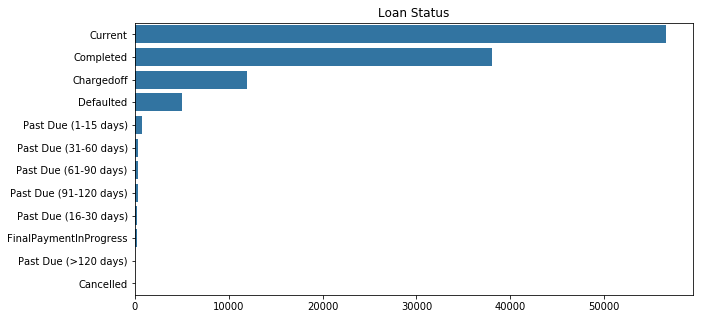

In [18]:
plt.figure(figsize = [10, 5]) 
order_rule=df['LoanStatus'].value_counts().index
sb.countplot(data=df, y='LoanStatus', color=base_color, order=order_rule)
plt.title('Loan Status')
plt.xlabel('')
plt.ylabel('')
;

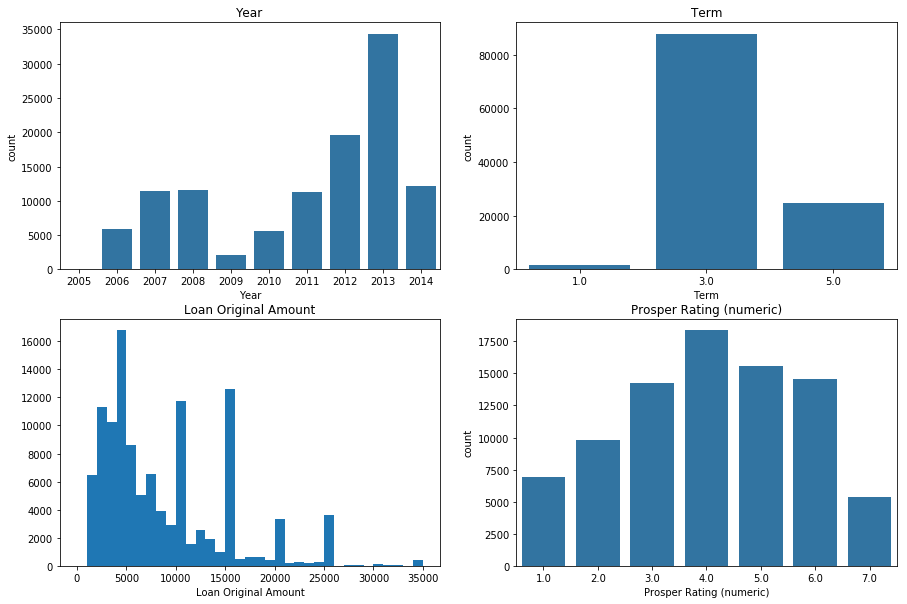

In [19]:
plt.figure(figsize = [15, 10]) 

plt.subplot(2, 2, 1) 
sb.countplot(data=df, x='Year',color=base_color);
plt.title('Year')
plt.xlabel('Year');

plt.subplot(2, 2, 2) 
sb.countplot(data=df, x='Term', color=base_color)
plt.title('Term')
plt.xlabel('Term')

plt.subplot(2, 2, 3) 
bin_edges = np.arange(0, df['LoanOriginalAmount'].max()+1000, 1000)
plt.hist(data=df, x='LoanOriginalAmount', bins=bin_edges)
plt.title('Loan Original Amount')
plt.xlabel('Loan Original Amount');

plt.subplot(2, 2, 4) 
sb.countplot(data=df, x='ProsperRating (numeric)',color=base_color)
plt.title('Prosper Rating (numeric)')
plt.xlabel('Prosper Rating (numeric)');


### Borrower Characteristics

The 2nd view is to count Loans **by the Borrowe Characteristics**, such as: 
* Employment Status
* Income Range
* Employment Status Duration
* Stated Monthly Income
* Is Borrower Homeowner 
* Income Verifiable

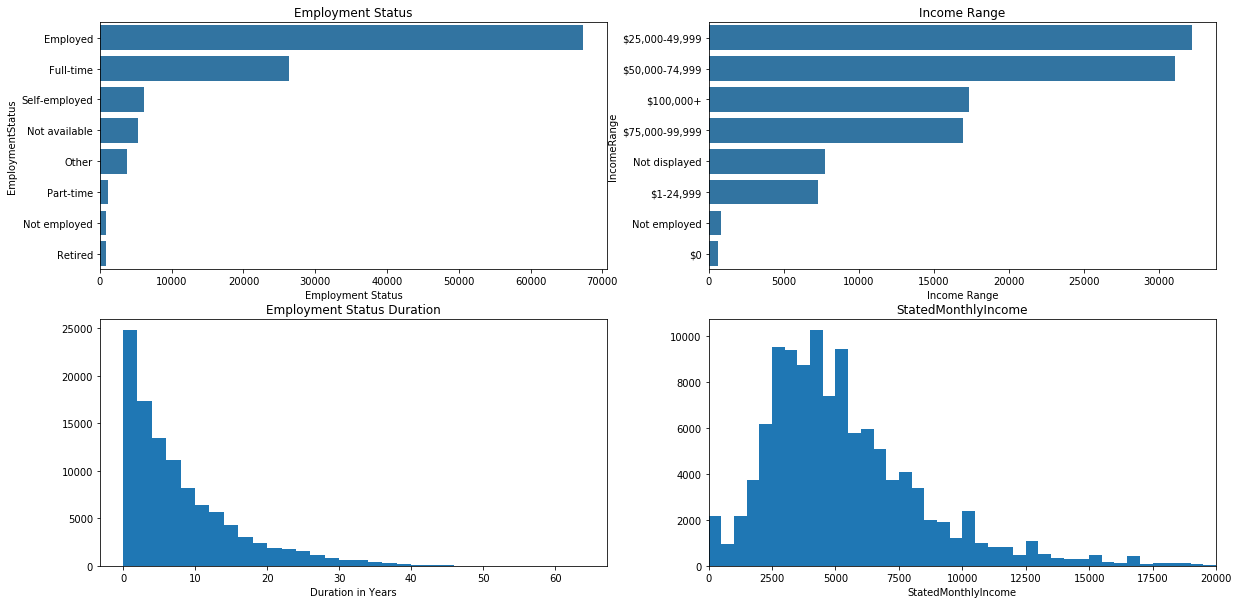

In [20]:
plt.figure(figsize = [20, 10]) 

plt.subplot(2, 2, 1) 
order_rule1=df['EmploymentStatus'].value_counts().index
sb.countplot(data=df, y='EmploymentStatus',color=base_color,order=order_rule1);
plt.title('Employment Status')
plt.xlabel('Employment Status');

plt.subplot(2, 2, 2) 
order_rule2=df['IncomeRange'].value_counts().index
sb.countplot(data=df, y='IncomeRange', color=base_color, order=order_rule2)
plt.title('Income Range')
plt.xlabel('Income Range')

plt.subplot(2, 2, 3) 
bin_edges = np.arange(0, df['EmploymentStatusDuration'].max()+2, 2)
plt.hist(data=df, x='EmploymentStatusDuration',bins=bin_edges);
plt.title('Employment Status Duration')
plt.xlabel('Duration in Years');

plt.subplot(2, 2, 4)
bin_edges = np.arange(0, df['StatedMonthlyIncome'].max()+500, 500)
plt.hist(data=df, x='StatedMonthlyIncome', bins=bin_edges)
plt.title('StatedMonthlyIncome')
plt.xlabel('StatedMonthlyIncome')
plt.xlim(0,20000);


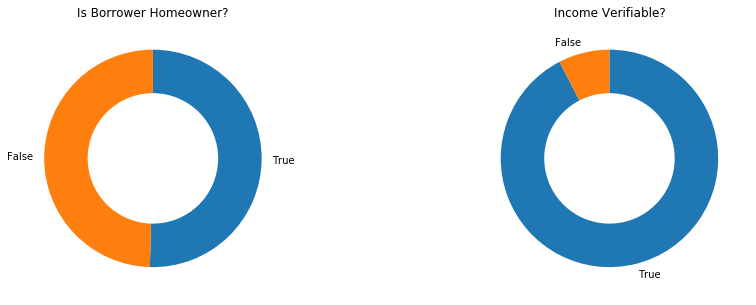

In [21]:
plt.figure(figsize = [15, 5]) 

plt.subplot(1, 2, 1) 
sorted_counts = df['IsBorrowerHomeowner'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.4});
plt.title('Is Borrower Homeowner?');

plt.subplot(1, 2, 2)
sorted_counts = df['IncomeVerifiable'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.4});
plt.title('Income Verifiable?');

### Borrower Financial Characteristics

The 3rd view is to count Loans by the **Borrower financial ratings**, such as:
* Borrower Rate
* Bankcard Utilization 
* Debt To Income Ratio
* Credit Score Range Lower

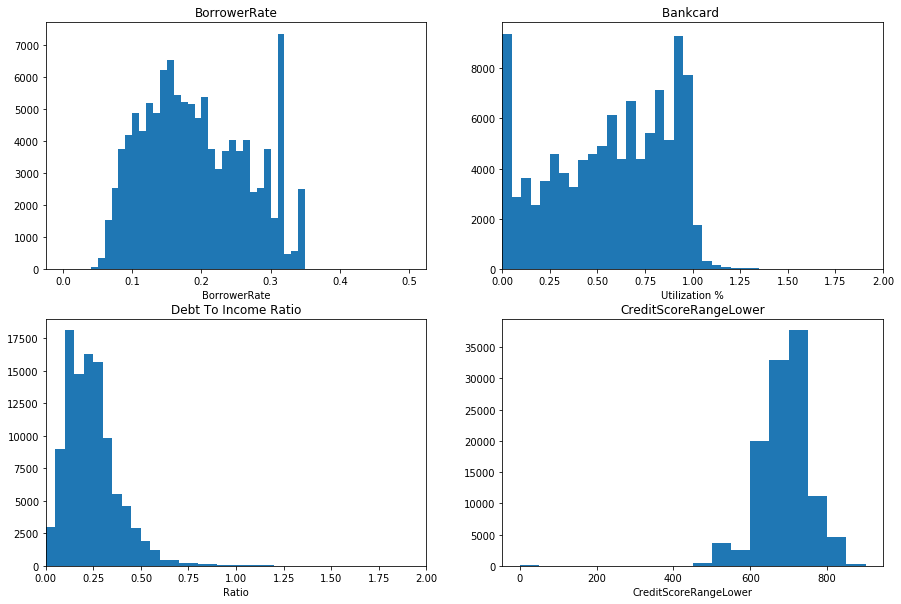

In [22]:
plt.figure(figsize = [15, 10]) 

plt.subplot(2, 2, 1) 
bin_edges = np.arange(0, df['BorrowerRate'].max()+0.01, 0.01)
plt.hist(data=df, x='BorrowerRate',bins=bin_edges);
plt.title('BorrowerRate')
plt.xlabel('BorrowerRate');

plt.subplot(2, 2, 2) 
bin_edges = np.arange(0, df['BankcardUtilization'].max()+0.05, 0.05)
plt.hist(data=df, x='BankcardUtilization', bins=bin_edges)
plt.title('Bankcard ')
plt.xlabel('Utilization %')
plt.xlim(0,2);

plt.subplot(2, 2, 3) 
bin_edges = np.arange(0, df['DebtToIncomeRatio'].max()+0.05, 0.05)
plt.hist(data=df, x='DebtToIncomeRatio', bins=bin_edges)
plt.title('Debt To Income Ratio')
plt.xlabel('Ratio')
plt.xlim(0,2);

plt.subplot(2, 2, 4) 
bin_edges = np.arange(0, df['CreditScoreRangeLower'].max()+50, 50)
plt.hist(data=df, x='CreditScoreRangeLower', bins=bin_edges)
plt.title('CreditScoreRangeLower')
plt.xlabel('CreditScoreRangeLower');

### Summary
> * This gave a high level overview on the Loans through different point of views. 
* Due to the outliers, an axis `lim` function was applied for the following graphs: 
    * Stated Monthly Income
    * Bankcard Utilization
    * Debt To Income Ratio

<a id='bivariate'></a>
## Bivariate and Multivariate Explorations

In this section, I'll investigate the relationships between pairs of variables in the data. 

Here is an overview of the process: 
* First to review the correlation matrix for the whole data set. 
* Investigate how Loan Characteristics changed over the years. 
* Investigate how Borrower Characteristics changed over the year.
* Investigate how Borrowers' financial ratings changed over the year.
* Investigate how Prosper Ratings Loans changed over the year. 

### Overview of Correlations

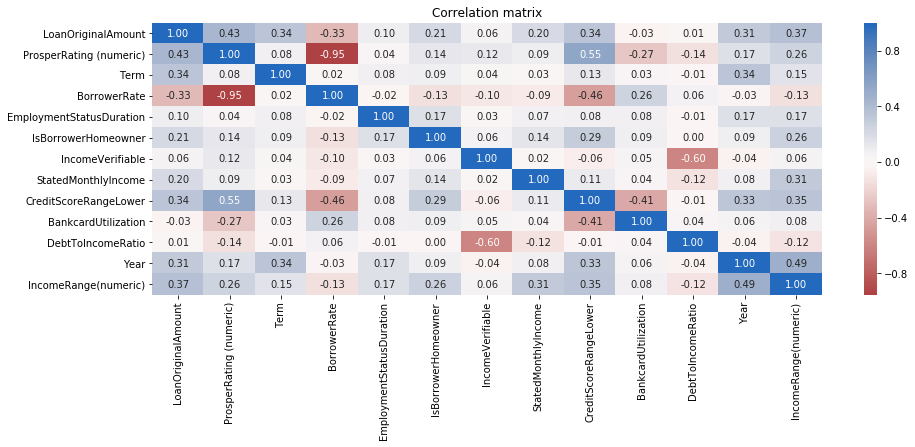

In [23]:
plt.figure(figsize = [15, 5]) 
sb.heatmap(df.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0)
plt.title('Correlation matrix');

#### Summary:
> Here is a list of interesting correlations:
   * Income Verifiable over Dept to Income Ration (corr = -0.60)
   * Year over Income Range (corr = 0.49)
   * Prosper Rating over Loan Amount (corr = 0.43)
   * Bankcard Utilisation over Credit Score Rating (corr = -0.41)
   * The correlation for Stated Monthly Income and Income Range is only 0.31. 

> The output of the matrix is used for the further, deeper investigation. 

### Loan Characteristics over the Years

**The heat map presents the total amount of loans ( in mln. ) for each Loan Status and Year.**

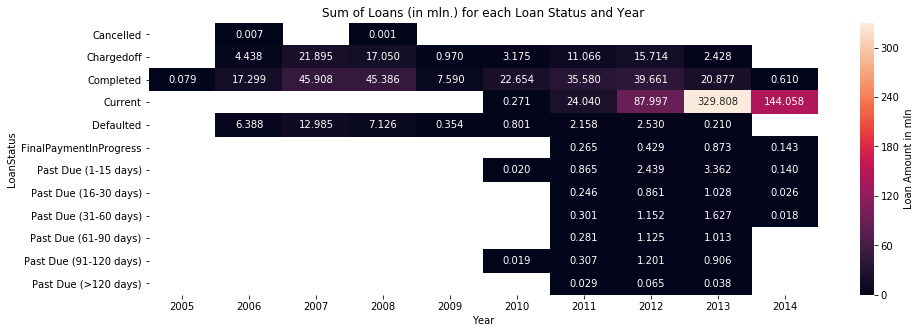

In [24]:
plt.figure(figsize = [15, 5]) 
df_set = df.groupby(['LoanStatus', 'Year']).sum()['LoanOriginalAmount']
df_set = df_set.reset_index(name = 'Number')
df_set['Number']=df_set['Number'].astype(float)/1000000
df_set = df_set.pivot(index = 'LoanStatus', columns = 'Year',
                            values = 'Number')
sb.heatmap(df_set, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'Loan Amount in mln'})
plt.title('Sum of Loans (in mln.) for each Loan Status and Year');

**The view of Loan Characteristics over years**

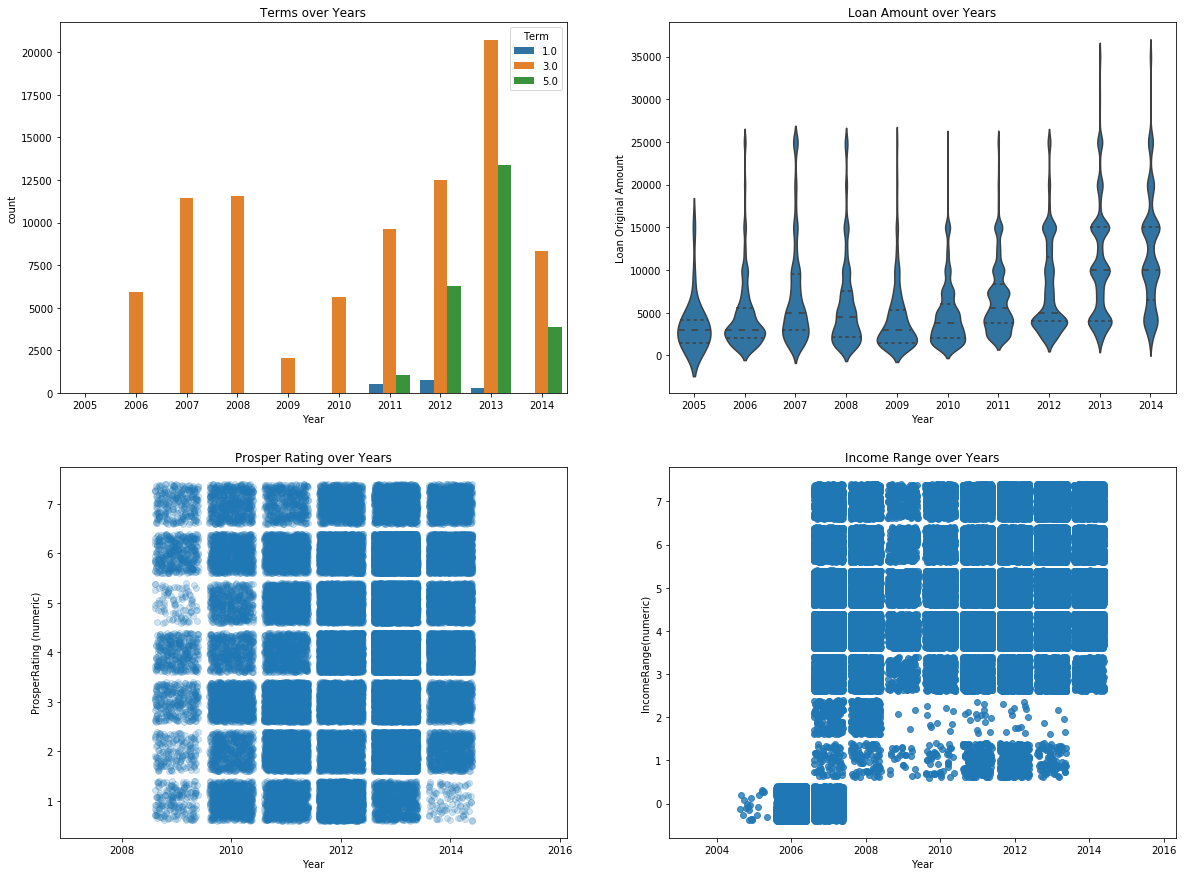

In [25]:
plt.figure(figsize = [20, 15]) 

plt.subplot(2, 2, 1) 
sb.countplot(data = df, x = 'Year', hue = 'Term')
plt.title ('Terms over Years');

plt.subplot(2, 2, 2) 
sb.violinplot(data = df, x = 'Year', y = 'LoanOriginalAmount', color = base_color,  inner = 'quartile', alpha=0.1)
plt.title ('Loan Amount over Years')
plt.xlabel('Year')
plt.ylabel('Loan Original Amount');

plt.subplot(2, 2, 3) 
sb.regplot(data = df, x = 'Year', y = 'ProsperRating (numeric)', fit_reg = False,
           x_jitter = 0.4, y_jitter = 0.4, scatter_kws = {'alpha' : 1/5});
plt.title ('Prosper Rating over Years')
plt.xlabel('Year')
plt.ylabel('ProsperRating (numeric)');

plt.subplot(2, 2, 4) 
sb.regplot(data = df, x = 'Year', y = 'IncomeRange(numeric)', fit_reg = False,
           x_jitter = 0.4, y_jitter = 0.4);
plt.title ('Income Range over Years')
plt.xlabel('Year')
plt.ylabel('IncomeRange(numeric)');

**"Prosper Rating over Years" and "Income Range over Years"** presented from different angles. 

/Users/svajuneklimasauskaite/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


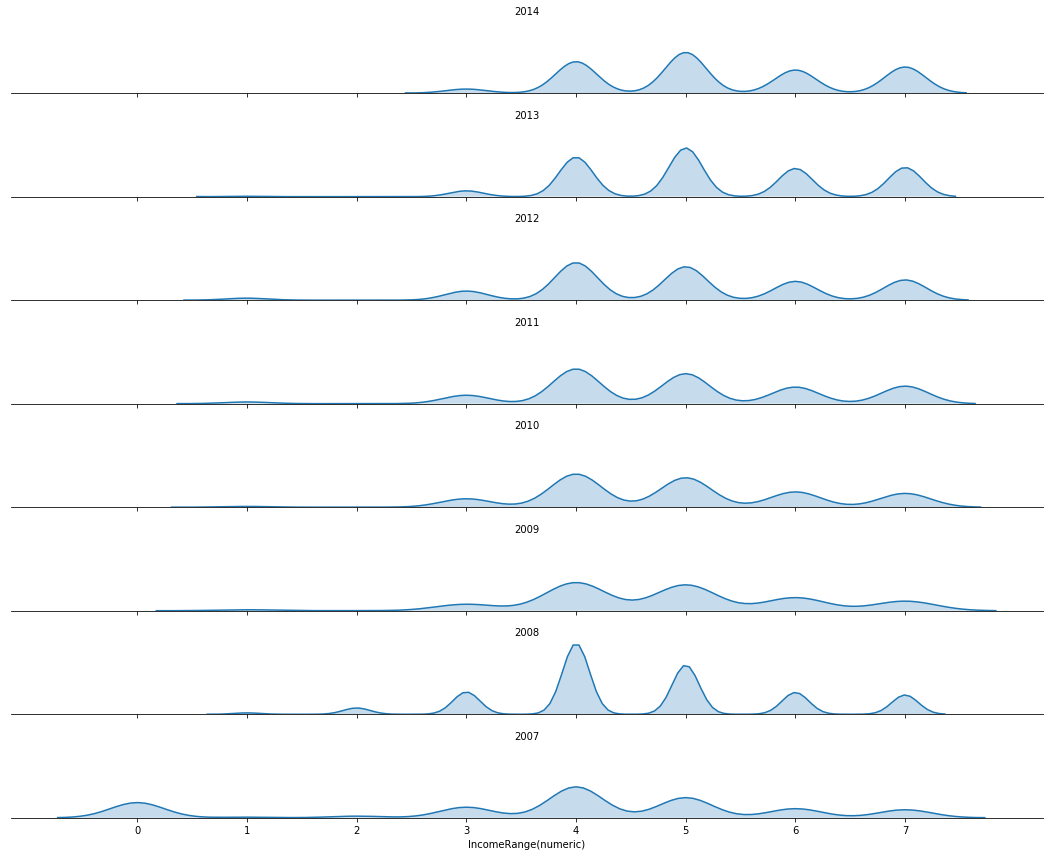

In [26]:
df_filter = df.query('Year>=2007')
group_means = df_filter.groupby(['Year']).mean()
group_order = group_means.sort_values(['Year'], ascending = False).index

# adjust the spacing of subplots with gridspec_kws
g = sb.FacetGrid(data = df, row = 'Year', height = 1.5, aspect = 10,
                 row_order = group_order);
g.map(sb.kdeplot, 'IncomeRange(numeric)', shade = True);

# remove the y-axes
g.set(yticks=[]);
g.set(xticks=[0,1,2,3,4,5,6,7])
g.despine(left=True);

g.set_titles('{row_name}');

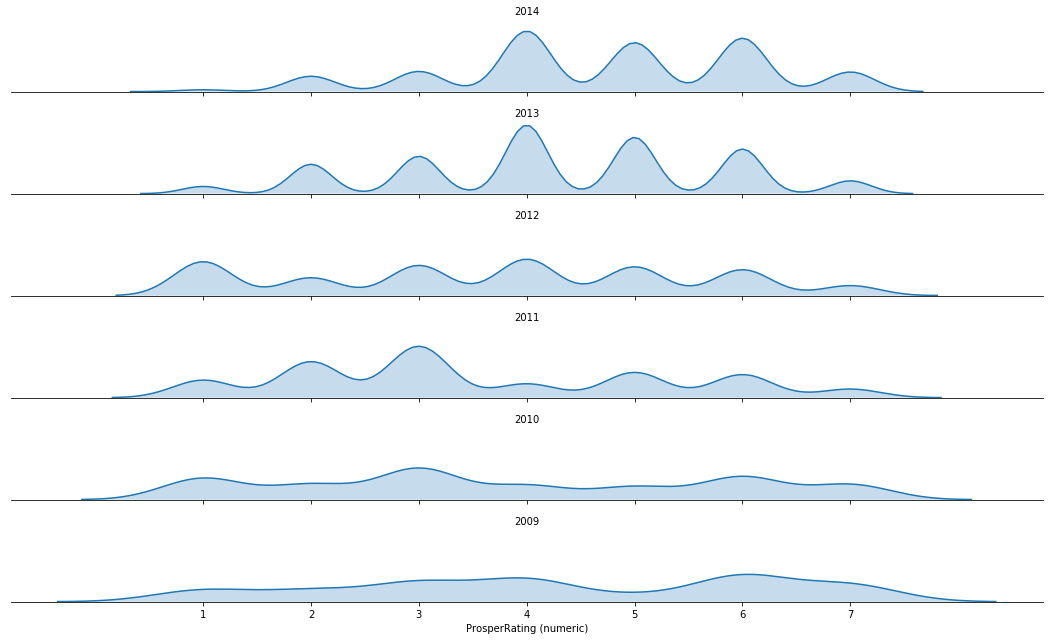

In [27]:
df_filterYear = df.query('Year>=2009')
group_means = df_filterYear.groupby(['Year']).mean()
group_order = group_means.sort_values(['Year'], ascending = False).index

# adjust the spacing of subplots with gridspec_kws
g = sb.FacetGrid(data = df_filterYear, row = 'Year', height = 1.5, aspect = 10,
                 row_order = group_order);
g.map(sb.kdeplot, 'ProsperRating (numeric)', shade = True);

# remove the y-axes
g.set(yticks=[]);
g.set(xticks=[1,2,3,4,5,6,7])
g.despine(left=True);

g.set_titles('{row_name}');

#### Summary:
> Loan characteristic changes over the years are obvious: 
* More Term varieties were introduced 
* Business was capable to scale and offer larger amount loans
* Over the years there were introduced higher granularity Loan Statuses
* Over the years the risk was better distribution towards the more secured loans. 

### Borrower Characteristics over the Years

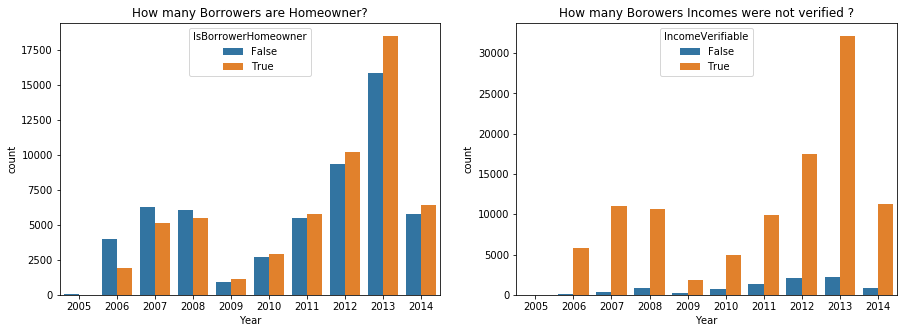

In [28]:
plt.figure(figsize = [15, 5]) 

plt.subplot(1, 2, 1) 
sb.countplot(data = df, x = 'Year', hue = 'IsBorrowerHomeowner')
plt.title ('How many Borrowers are Homeowner?');

plt.subplot(1, 2, 2) 
sb.countplot(data = df, x = 'Year', hue = 'IncomeVerifiable')
plt.title ('How many Borowers Incomes were not verified ?');

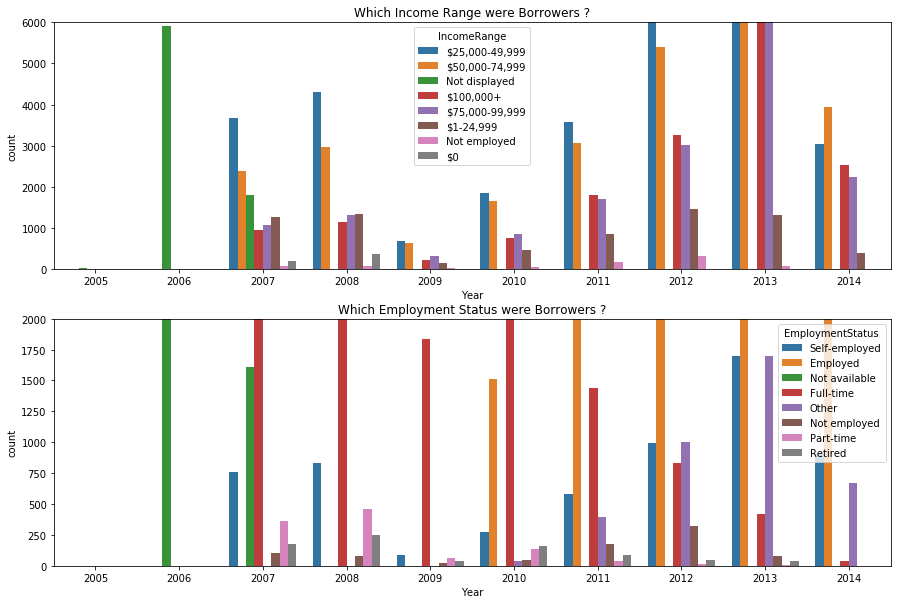

In [29]:
plt.figure(figsize = [15, 10])

plt.subplot(2, 1, 1) 
sb.countplot(data = df, x = 'Year', hue = 'IncomeRange')
plt.title ('Which Income Range were Borrowers ?')
plt.ylim(0,6000);

plt.subplot(2, 1, 2) 
sb.countplot(data = df, x = 'Year', hue = 'EmploymentStatus')
plt.title ('Which Employment Status were Borrowers ?')
plt.ylim(0,2000);

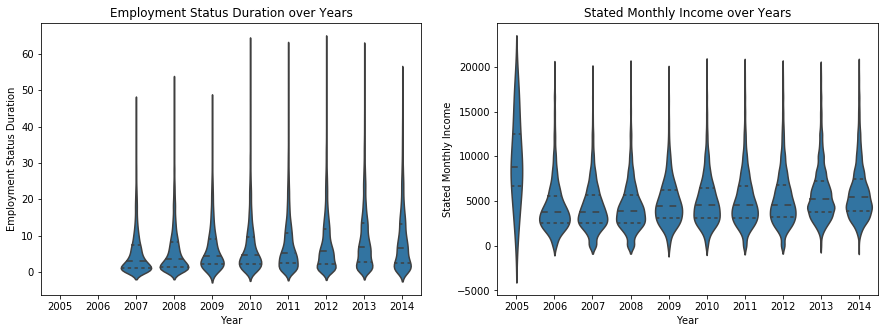

In [30]:
plt.figure(figsize = [15, 5]) 

plt.subplot(1, 2, 1)
sb.violinplot(data = df, x = 'Year', y = 'EmploymentStatusDuration', color = base_color,  inner = 'quartile', alpha=0.1)
plt.title ('Employment Status Duration over Years')
plt.xlabel('Year')
plt.ylabel('Employment Status Duration');

plt.subplot(1, 2, 2)
df_scatter=df.query('StatedMonthlyIncome<20000')
sb.violinplot(data = df_scatter, x = 'Year', y = 'StatedMonthlyIncome', color = base_color,  inner = 'quartile', alpha=0.1)
plt.title ('Stated Monthly Income over Years')
plt.xlabel('Year')
plt.ylabel('Stated Monthly Income');

#### Summary:
> Borrower characteristics changed over the years:
* After the financial crisis, the majority of the borrowers were homeowners.
* Small percentage of borrowers are marked as haven't income verification. 
* With the years there were fewer borrowers without a job and without an income. 
* With the years' loans changed for the borrowers with a longer employment status duration. 

### Borrowers Financial Characteristics over the Years

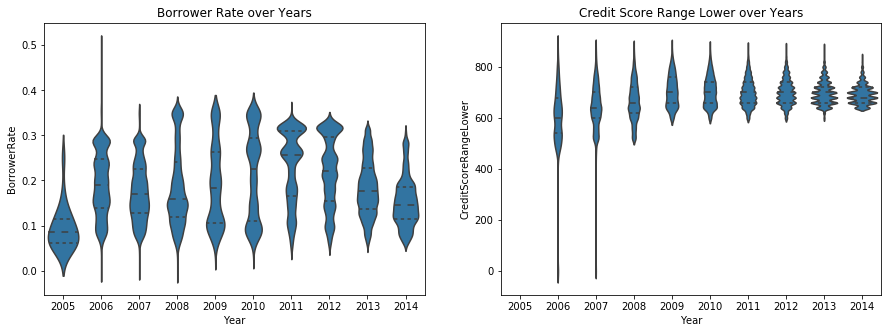

In [31]:
plt.figure(figsize = [15, 5]) 

plt.subplot(1, 2, 1) 
sb.violinplot(data = df, x = 'Year', y = 'BorrowerRate', color = base_color,  inner = 'quartile');
plt.title ('Borrower Rate over Years')

plt.subplot(1, 2, 2) 
sb.violinplot(data = df, x = 'Year', y = 'CreditScoreRangeLower', color = base_color,  inner = 'quartile');
plt.title ('Credit Score Range Lower over Years');

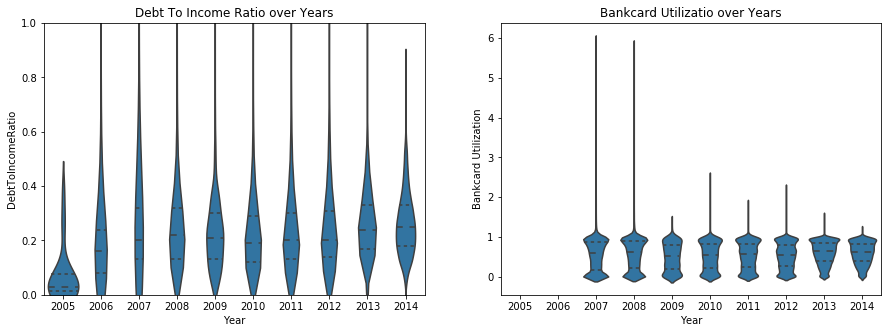

In [32]:
plt.figure(figsize = [15, 5]) 

plt.subplot(1, 2, 1) 
sb.violinplot(data = df, x = 'Year', y = 'DebtToIncomeRatio', color = base_color,  inner = 'quartile')
plt.title ('Debt To Income Ratio over Years')
plt.ylim(0,1);

plt.subplot(1, 2, 2) 
sb.violinplot(data = df, x = 'Year', y = 'BankcardUtilization', color = base_color,  inner = 'quartile', alpha=0.1)
plt.title ('Bankcard Utilizatio over Years')
plt.xlabel('Year')
plt.ylabel('Bankcard Utilization');

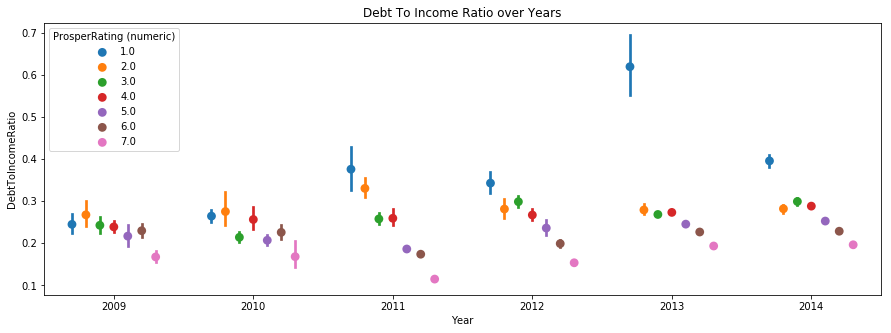

In [33]:
plt.figure(figsize = [15, 5]) 
df_year=df.query('Year>=2009')
ax = sb.pointplot(data = df_year, x = 'Year', y = 'DebtToIncomeRatio', hue = 'ProsperRating (numeric)',
                  dodge = 0.6, linestyles = "")
plt.title ('Debt To Income Ratio over Years');

#### Summary:

> Financial characteristics shows the maturity level,i.e:
* fewer outliers over the years, 
* more secure loans,
* better risk distribution. 

### Additional Financial Views

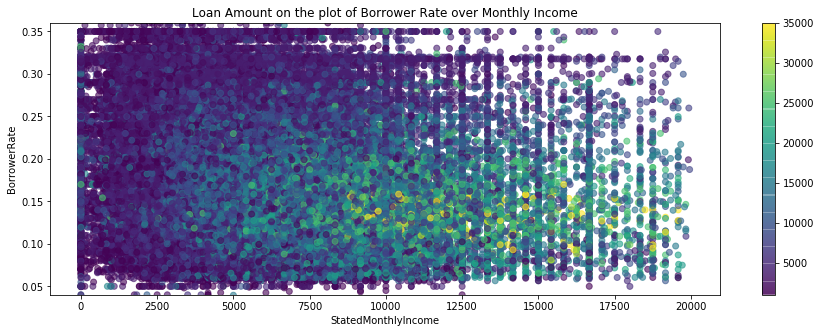

In [34]:
plt.figure(figsize = [15, 5]) 
plt.scatter(data = df_scatter, x = 'StatedMonthlyIncome', y = 'BorrowerRate', c='LoanOriginalAmount', alpha=0.6)
plt.colorbar()
plt.title ('Loan Amount on the plot of Borrower Rate over Monthly Income')
plt.xlabel('StatedMonthlyIncome')
plt.ylabel('BorrowerRate');
plt.ylim(0.04,0.36);

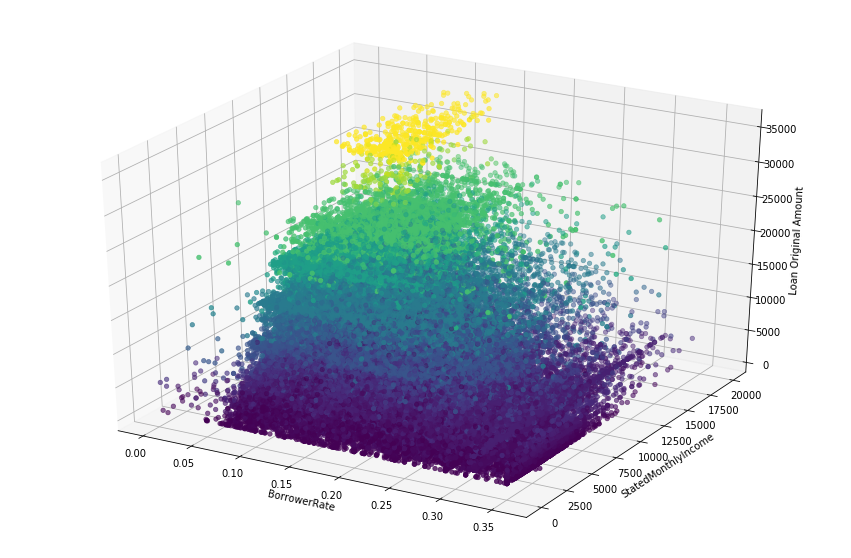

In [35]:
plt.figure(figsize = [15, 10]) 
ax = plt.axes(projection='3d')
df_scatter = df_scatter.query('BorrowerRate>0.04' and 'BorrowerRate<0.36')
x = df_scatter['BorrowerRate']
y = df_scatter['StatedMonthlyIncome']
z = df_scatter['LoanOriginalAmount']
ax.scatter(x, y, z, c=z, zdir='90', cmap='viridis', linewidth=0.7, depthshade=True);
ax.set_xlabel('BorrowerRate')
ax.set_ylabel('StatedMonthlyIncome')
ax.set_zlabel('Loan Original Amount');

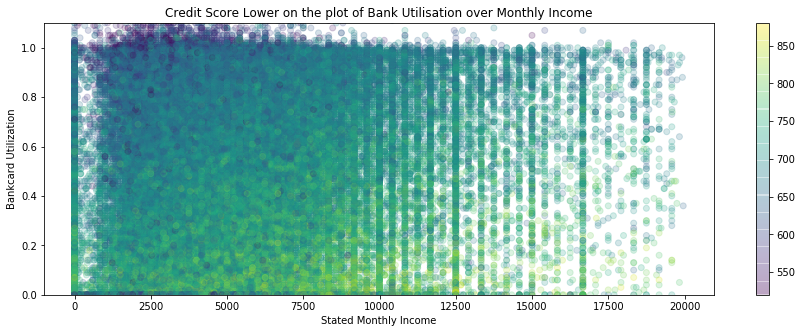

In [36]:
plt.figure(figsize = [15, 5]) 
#sb.palplot(sb.color_palette(n_colors=9))
plt.scatter(data = df_scatter, x = 'StatedMonthlyIncome', y = 'BankcardUtilization', 
            c='CreditScoreRangeLower', alpha=0.2)
plt.colorbar()
plt.title ('Credit Score Lower on the plot of Bank Utilisation over Monthly Income')
plt.xlabel('Stated Monthly Income')
plt.ylabel('Bankcard Utilization')
#plt.imshow(a, cmap='hot', interpolation='nearest')
#plt.ylim(0.8,1.2)
plt.ylim(0,1.1);

#### Summary:

> Additional Financial views show:
* Bigger amount of loans have lower borrow rate and issued for the borrowers with higher monthly salary.  
* Credit score rate correlates with Bankcard Utilisation. With higher Bankcard Utilisation and lower monthly salary, there is a high chance to be rated with a lower Credit Score.

### Prosper Rating view

**The overview of Prosper Loan distribution with the Prosper Ratings**

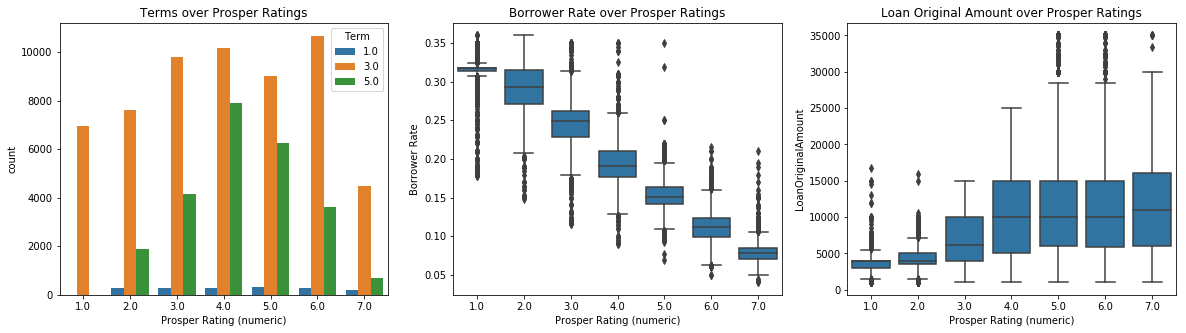

In [37]:
plt.figure(figsize = [20, 5]) 

plt.subplot(1, 3, 1) 
sb.countplot(data = df, x = 'ProsperRating (numeric)', hue = 'Term');
plt.title ('Terms over Prosper Ratings')
plt.xlabel('Prosper Rating (numeric)');

plt.subplot(1, 3, 2) 
sb.boxplot(data = df, x = 'ProsperRating (numeric)', y = 'BorrowerRate', color = base_color)
plt.title ('Borrower Rate over Prosper Ratings')
plt.xlabel('Prosper Rating (numeric)')
plt.ylabel('Borrower Rate');

plt.subplot(1, 3, 3) 
sb.boxplot(data = df, x = 'ProsperRating (numeric)', y = 'LoanOriginalAmount', color = base_color)
plt.title ('Loan Original Amount over Prosper Ratings')
plt.xlabel('Prosper Rating (numeric)')
plt.ylabel('LoanOriginalAmount');

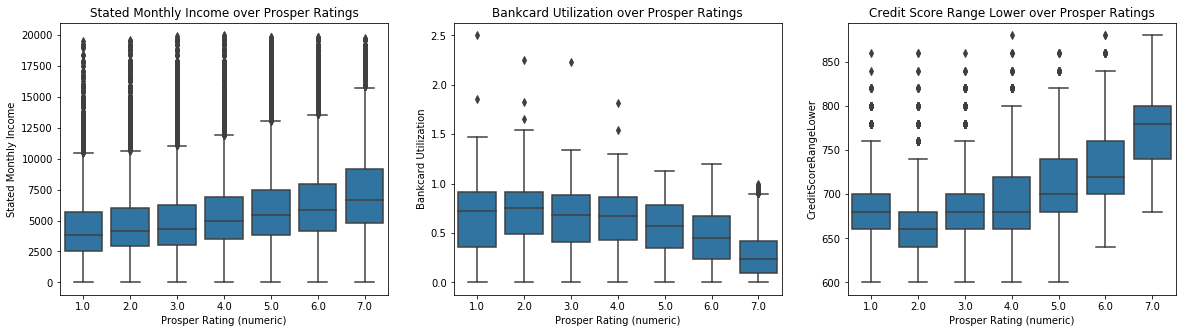

In [38]:
plt.figure(figsize = [20, 5]) 

plt.subplot(1, 3, 1) 
df_scatter=df.query('StatedMonthlyIncome<20000')
sb.boxplot(data = df_scatter, x = 'ProsperRating (numeric)', y = 'StatedMonthlyIncome', color = base_color)
plt.title ('Stated Monthly Income over Prosper Ratings')
plt.xlabel('Prosper Rating (numeric)')
plt.ylabel('Stated Monthly Income');

plt.subplot(1, 3, 2) 
sb.boxplot(data = df, x = 'ProsperRating (numeric)', y = 'BankcardUtilization', color = base_color)
plt.title ('Bankcard Utilization over Prosper Ratings')
plt.xlabel('Prosper Rating (numeric)')
plt.ylabel('Bankcard Utilization');

plt.subplot(1, 3, 3) 
sb.boxplot(data = df, x = 'ProsperRating (numeric)', y = 'CreditScoreRangeLower', color = base_color)
plt.title ('Credit Score Range Lower over Prosper Ratings')
plt.xlabel('Prosper Rating (numeric)')
plt.ylabel('CreditScoreRangeLower');

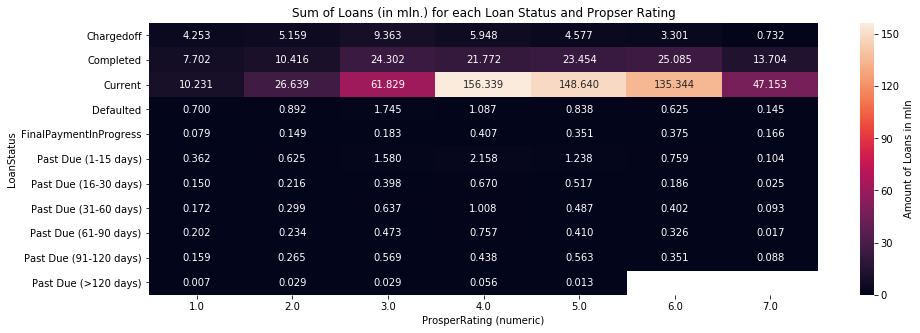

In [39]:
plt.figure(figsize = [15, 5]) 
df_set = df.groupby(['ProsperRating (numeric)', 'LoanStatus']).sum()['LoanOriginalAmount']
df_set = df_set.reset_index(name = 'Number')
df_set['Number'] = df_set['Number'].astype(float)/1000000
df_set = df_set.pivot(index = 'LoanStatus', columns = 'ProsperRating (numeric)',
                            values = 'Number')
sb.heatmap(df_set, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'Amount of Loans in mln'})
plt.title ('Sum of Loans (in mln.) for each Loan Status and Propser Rating');

#### Summary:

> Prosper Rating is well established. 

<a id='conclusions'></a>
## Conclusions

1. There were data from 2005 until the beginning of 2014. 2005 and 204 years were not full. 
2. Due to the outliers, an axis lim function was applied for the following graphs:
    * Stated Monthly Income
    * Bankcard Utilization
    * Debt To Income Ratio
3. Here is a list of surprising correlations that were captured with the correlation matrix:
   * Income Verifiable over Dept to Income Ration (corr = -0.60)
   * Bankcard Utilisation over Credit Score Rating (corr = -0.41)
   * The correlation for Stated Monthly Income and Income Range was surprisingly low, only 0.31. 
4. Loan characteristics changed over the years: 
    * More Term varieties were introduced 
    * Business was capable to scale and offer larger amount loans
    * Over the years there were introduced higher granularity Loan Statuses
    * Over the years the risk was better differentiated. 
5. Borrower characteristics changed over the years: 
    * After the financial crisis, the majority of the borrowers were homeowners.
    * With the years there were fewer borrowers without a job and without an income.
    * With the years' loans changed for the borrowers with a longer employment status duration.
6. Financial characteristics showed maturity level over the years, i.e.:
    * fewer outliers over the years,
    * more secured loans,
    * better risk distribution.
7. Additional Financial views showed:
    * Bigger amount of loans have lower borrow rate and issued for the borrowers with higher monthly salary.  
    * Credit score rate correlates with Bankcard Utilisation. With higher Bankcard Utilisation and lower monthly salary, there is a high chance to be rated with a lower Credit Score.
8. Prosper Rating is well established. 

<a id='finalreport'></a>
## Presentation

Final report can be viewed by clicking [here](https://github.com/SvajuneK/Udacity-Projects/tree/master/Data%20Analyst%20ND/P4%20Prosper%20Loans%20Analysis/Report).